<a href="https://colab.research.google.com/github/tz2004a/sklearnWork/blob/Google-Colab-Notebooks/MLP_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1
%pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

In [ ]:
import tensorflow as tf
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
y_test.size

10000

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
# Trying to just have Classes 0, 1, 2
import numpy as np

full_train = X_train + y_train

ValueError: ignored

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
# Normalise the inputs so that pixel values are in the 0-1 range rather than 0-255
X_train /= 255
X_test /= 255

In [ ]:
# One hot encoding
num_classes = 10
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
# CNN Model
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

NameError: ignored

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
#kfold crossvalidation model
from sklearn.model_selection import KFold
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  #enumerate splits
  for train_ix, test_ix, in kfold.split(dataX):
    model = define_model()
    X_train, Y_train, X_test, Y_test = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), verbose=0)
    # evaluate model
    _, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)
  return scores, histories

In [ ]:
# actually evaluating the model
scores, histories = evaluate_model(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


ValueError: ignored

In [ ]:
Y_train.

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Y_train.size

600000

In [ ]:
X_train.size

47040000

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib



In [ ]:
# read in the data
from sklearn import datasets
from sklearn.datasets import fetch_openml
#X, y = fetch_openml('Fashion-MNIST')

# THIS WORKS!!!
#(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

#Now, the real deal
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Resize the images
#train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
#test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Trying to understand the data
train_images[35][1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   8,
        98,  41, 113,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [ ]:
len(train_images[5])

28

In [ ]:
# Preprocessing
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

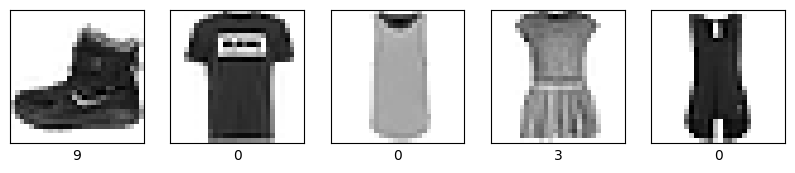

In [ ]:
# Display the first 5 images
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

0